Potrebno je odrediti centar $(p, q)$ i poluprečnik kruga $r$ koji u srednjekvadratnom smislu najbolje aproksimira skup tačaka: (0.7, 4), (7.5, 1.3), (3.3, 4.7), (6.4, -1.1), (5.6, 4.0), (4.4, -3), (0.3, -2.5) i (-1.1, 1.3). Kolika greška se pravi ovom aproksimacijom?

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
points = [(0.7, 4), (7.5, 1.3), (3.3, 4.7), (6.4, -1.1), (5.6, 4.0), (4.4, -3), (0.3, -2.5), (-1.1, 1.3)]

In [3]:
# broj tacaka
N = len(points)
N

8

In [4]:
# koordinate tacaka
x = np.array([point[0] for point in points])
y = np.array([point[1] for point in points])

Jednačina kruga $(x-p)^2 + (y-q)^2 = r^2$ se može zapisati u obliku $(p^2 + q^2 - r^2) -2xp - 2yp = -x^2 -y^2$, tj. $c - 2xp - 2yp = -x^2 -y^2$ uz $c=p^2 + q^2 - r^2$ tako da je zavisnost između nepoznatih linearna. 

In [5]:
# sistem po nepoznatima c, p i q se resava bibilioteckom funkcijom lstsq
A = np.vstack((np.ones(N), -2*x, -2*y)).T
b = -x**2 -y**2

In [6]:
coefs, rss, _, _ = np.linalg.lstsq(A, b, rcond=None)

In [7]:
c, p, q = coefs

In [8]:
print('Centar kruga je: (', p , ',', q, ')')

Centar kruga je: ( 3.0603035657273527 , 0.7436073210423227 )


In [9]:
r = np.sqrt(p**2 + q**2 -c)

In [10]:
print('Poluprecnik kruga je: ', r)

Poluprecnik kruga je:  4.109137036074778


In [11]:
print('Srednjekvadratna greska koja se pravi aproksimacijom je: ', rss[0]/N)

Srednjekvadratna greska koja se pravi aproksimacijom je:  2.5566796885159953


Crtez:

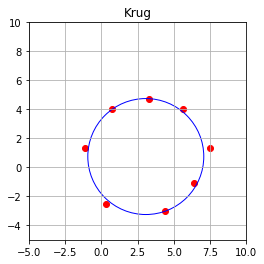

In [12]:
circle = plt.Circle((p, q), 4, color='blue', fill = False)

fig, ax = plt.subplots()

plt.xlim(-5,10)
plt.ylim(-5,10)
plt.grid(linestyle='-')
ax.set_aspect(1)

ax.add_artist(circle)

plt.title('Krug')

plt.scatter(x, y, color = 'red')

plt.show()

Matplotlib artists: 
<br>
https://matplotlib.org/3.1.3/gallery/shapes_and_collections/artist_reference.html#sphx-glr-gallery-shapes-and-collections-artist-reference-py